# EDA on COVID19 Tweets

In [121]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [122]:
import pandas as pd
import numpy as np

In [123]:
df = pd.read_csv("/opt/notebooks/dataset/covid19_tweets.csv")

In [124]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [125]:
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
102596,Blood Donors India,"Mumbai, India",Focused on matching blood donors with those in...,2008-12-23 07:55:39,1218693,2068,19577,True,2020-08-10 15:10:12,#Srinagar \nNeed #Blood Type : A-positive\nAt...,"['Srinagar', 'Blood', 'COVID19']",Blood Donors India,False
102597,Club of Mozambique,"Maputo, Mozambique",Club of Mozambique website is as an entryway i...,2009-08-26 08:51:20,17149,2750,59,False,2020-08-10 15:10:10,Coronavirus: 28 more cases in #Mozambique brin...,"['Mozambique', 'Mocambique']",Buffer,False
102598,Nikki🧢,United Kingdom,Matthew 6:26 | preferred pronouns: Her Ladyshi...,2014-08-08 14:40:34,103,234,22187,False,2020-08-10 15:10:10,Why do so many handwash brands use squeeze bot...,NaN,Twitter for Android,False
102599,PghFoodBank,"Pittsburgh (Duquesne), PA",Greater Pittsburgh Community Food Bank: Workin...,2009-09-10 14:07:26,10505,733,2075,False,2020-08-10 15:10:09,Food prices are rising and food insecurity is ...,['BoostSNAPNow'],Hootsuite Inc.,False
102600,The Hive,"Palo Alto, India and Brazil.","Venture studio to co-create, fund & launch AI ...",2012-08-20 23:20:21,4644,3877,3040,False,2020-08-10 15:10:09,We're excited to be hosting a healthy debate o...,"['CDC', 'FDA', 'COVID19']",Twitter Web App,False


In [126]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.026010e+05,102601.000000,1.026010e+05
mean,1.018105e+05,2173.201908,1.504107e+04
std,8.027212e+05,9607.486075,4.586419e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.710000e+02,156.000000,2.260000e+02
50%,9.840000e+02,555.000000,1.905000e+03
75%,5.229000e+03,1764.000000,9.897000e+03
max,1.389284e+07,497363.000000,2.047197e+06


In [127]:
print('Shape of tweets dataframe : {}'.format(df.shape))

Shape of tweets dataframe : (102601, 13)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102601 entries, 0 to 102600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         102601 non-null  object
 1   user_location     81775 non-null   object
 2   user_description  96813 non-null   object
 3   user_created      102601 non-null  object
 4   user_followers    102601 non-null  int64 
 5   user_friends      102601 non-null  int64 
 6   user_favourites   102601 non-null  int64 
 7   user_verified     102601 non-null  bool  
 8   date              102601 non-null  object
 9   text              102601 non-null  object
 10  hashtags          73065 non-null   object
 11  source            102574 non-null  object
 12  is_retweet        102601 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 8.8+ MB



## Plot Missing Values

In [129]:


import seaborn as sns
import matplotlib.pyplot as plt

def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()
     

In [130]:


return_missing_values(df)

source              0.000263
user_description    0.056413
user_location       0.202980
hashtags            0.287872
dtype: float64

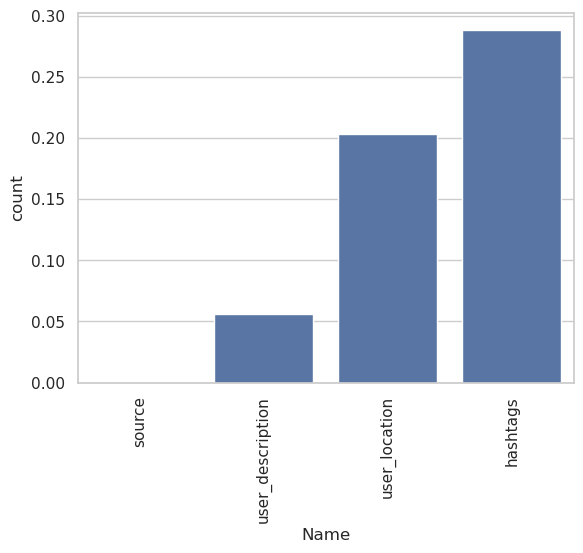

In [131]:
plot_missing_values(df)

### Acceptable color pallets in seaborn (i.e. we can experiment with `cmap` value below) : <br>

```python
Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
```


<Axes: >

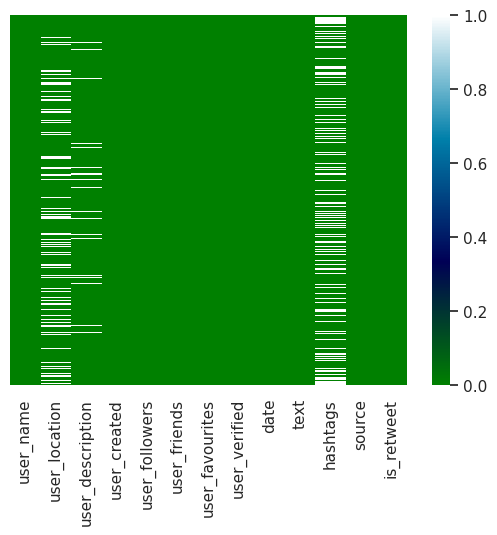

In [132]:
# heatmap representation of missing values

# plasma,visdir

sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='ocean')

## Plot Unique Values 

In [133]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [134]:
udf = return_unique_values(df)
print(udf)

            Features  Uniques
0          user_name    59510
1      user_location    18570
2   user_description    56929
3       user_created    60432
4     user_followers    19523
5       user_friends     8806
6    user_favourites    25760
7      user_verified        2
8               date    76322
9               text   102408
10          hashtags    31436
11            source      514
12        is_retweet        1


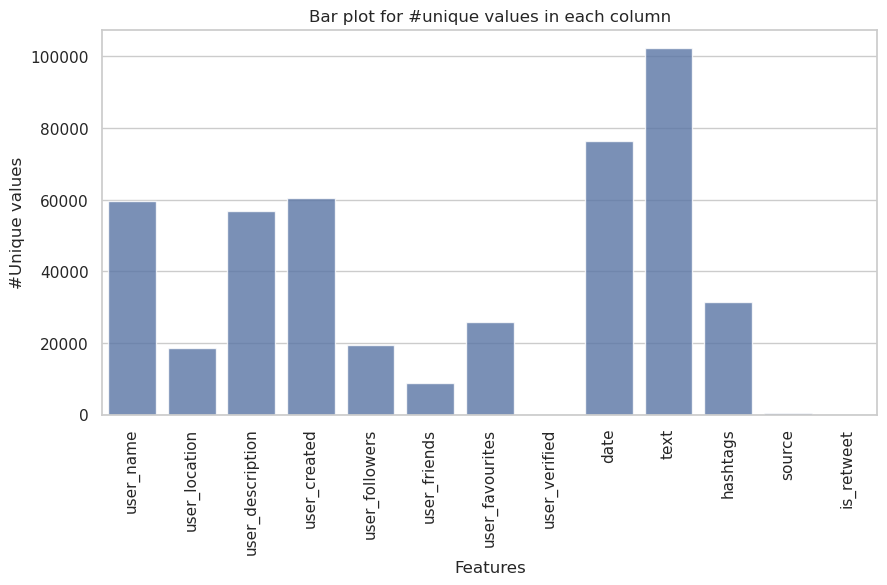

In [135]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for #unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Frequency of users tweeting about Corona

In [136]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    

/tmp/ipykernel_1134/1023070121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)


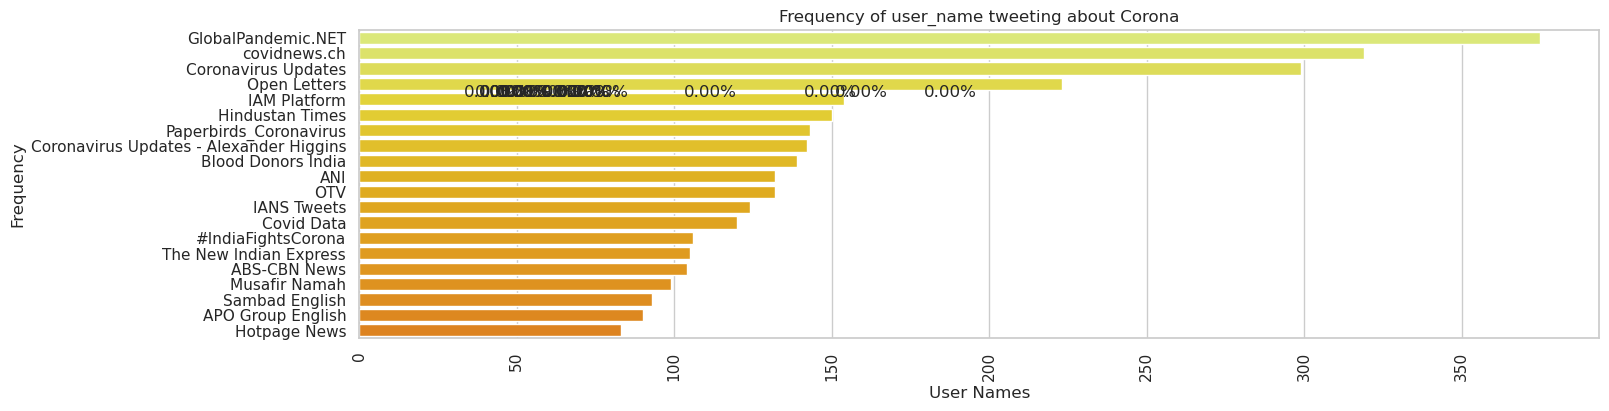

In [137]:
plot_frequency_charts(df, 'user_name', 'User Names','Wistia')

## Frequency of locations tweeting about Corona

/tmp/ipykernel_1134/1023070121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)


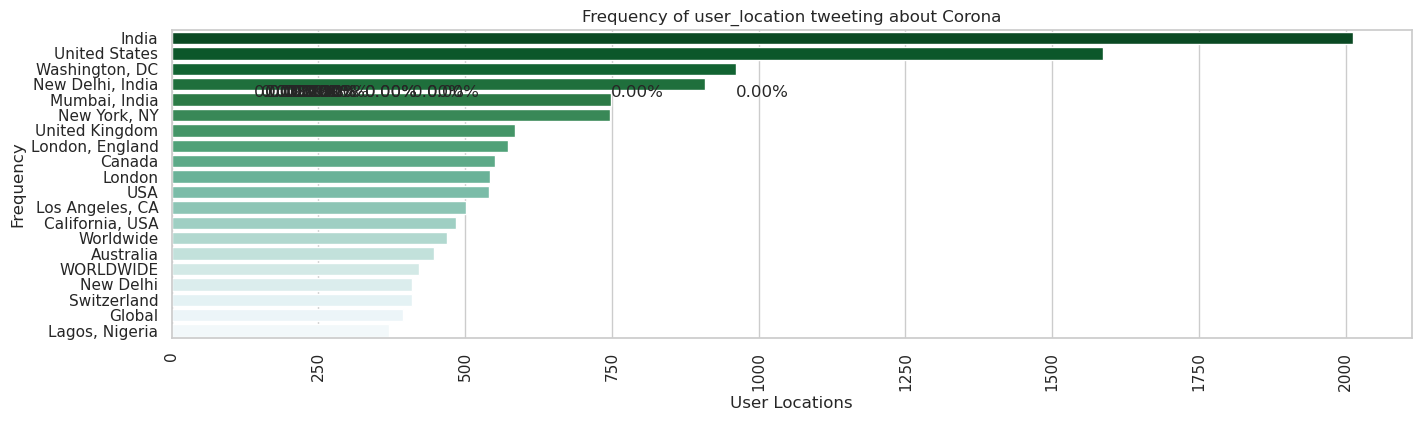

In [138]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'BuGn_r')

## Frequency of sources tweeting about Corona

/tmp/ipykernel_1134/1023070121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)


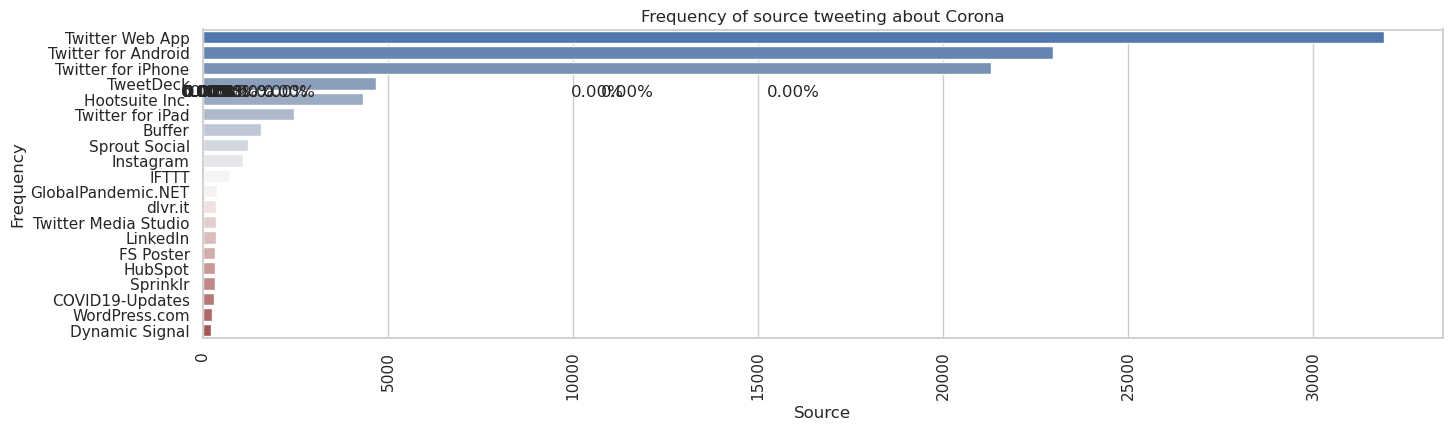

In [139]:
plot_frequency_charts(df, 'source','Source', 'vlag')

## Visualizing top 30 words location wise

In [140]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [142]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [143]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');
    

In [144]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [145]:
from wordcloud import WordCloud, STOPWORDS



def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.user_location==location]
    loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()
    

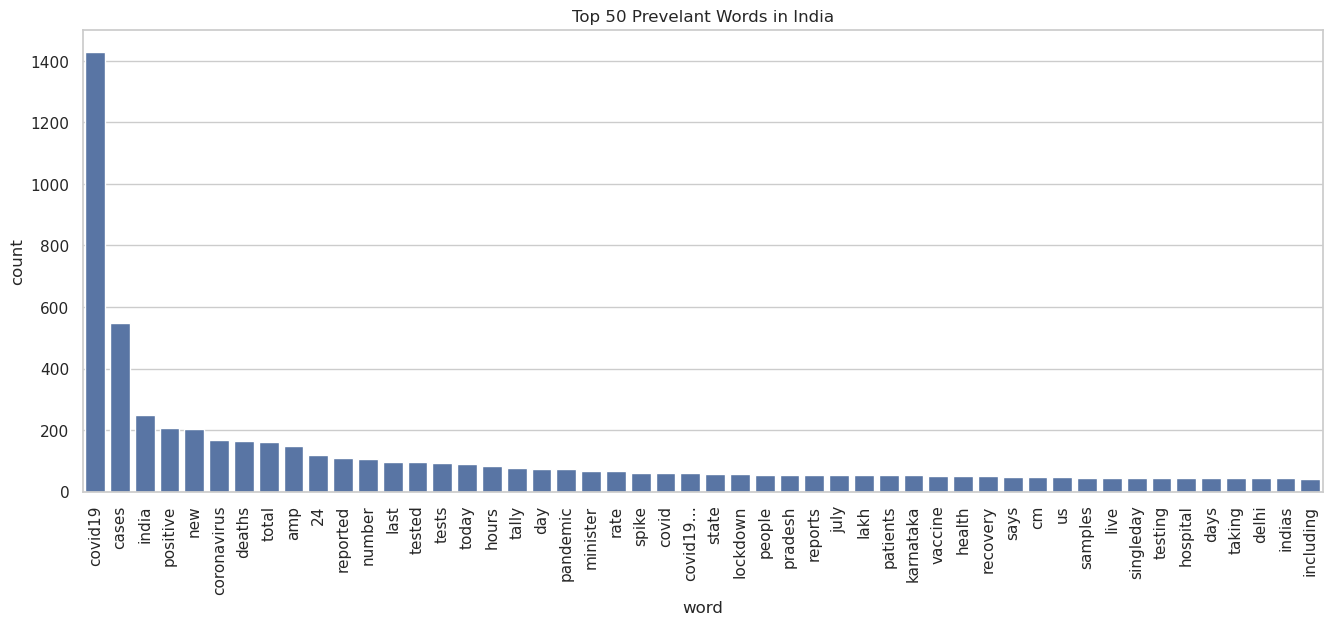

In [146]:
draw_bar_graph_for_text_visualization(df, 'India')

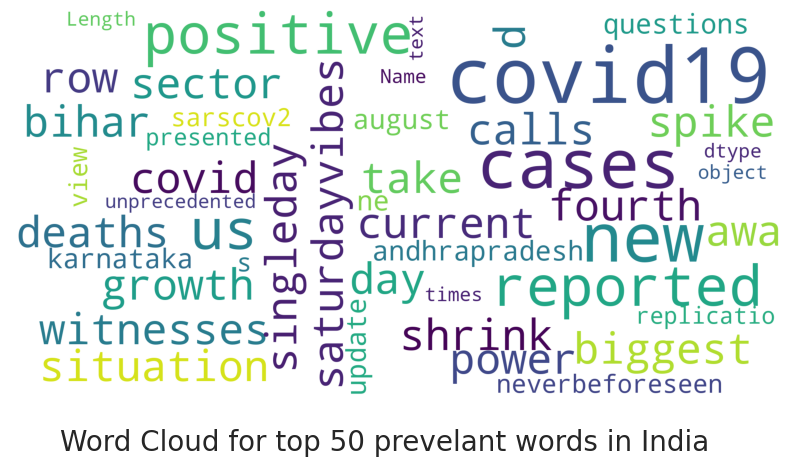

In [147]:
draw_word_cloud(df, 'India', 'Word Cloud for top 50 prevelant words in India')

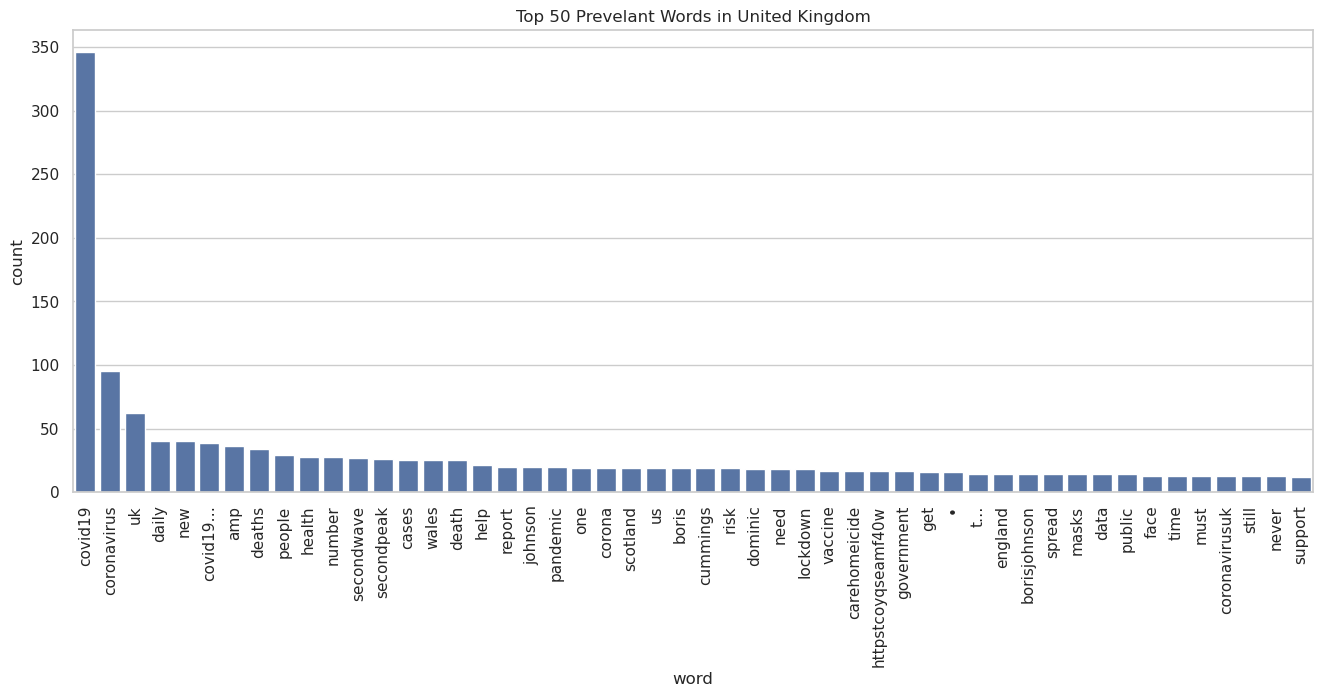

In [148]:
draw_bar_graph_for_text_visualization(df, 'United Kingdom')

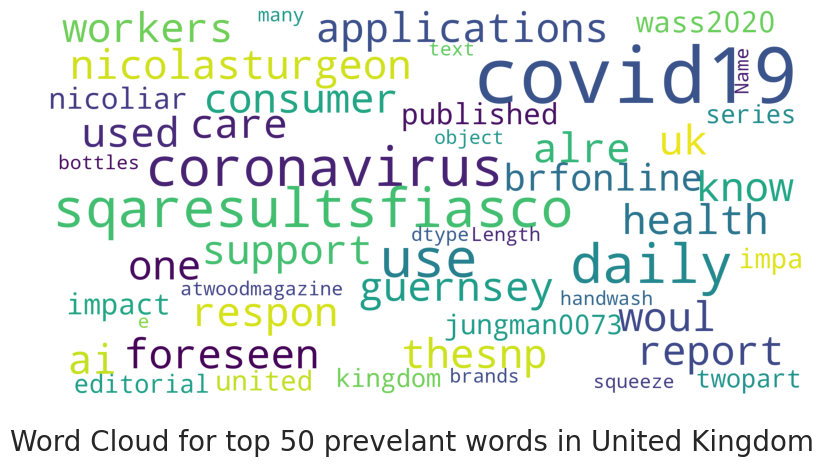

In [149]:
draw_word_cloud(df, 'United Kingdom', 'Word Cloud for top 50 prevelant words in United Kingdom')

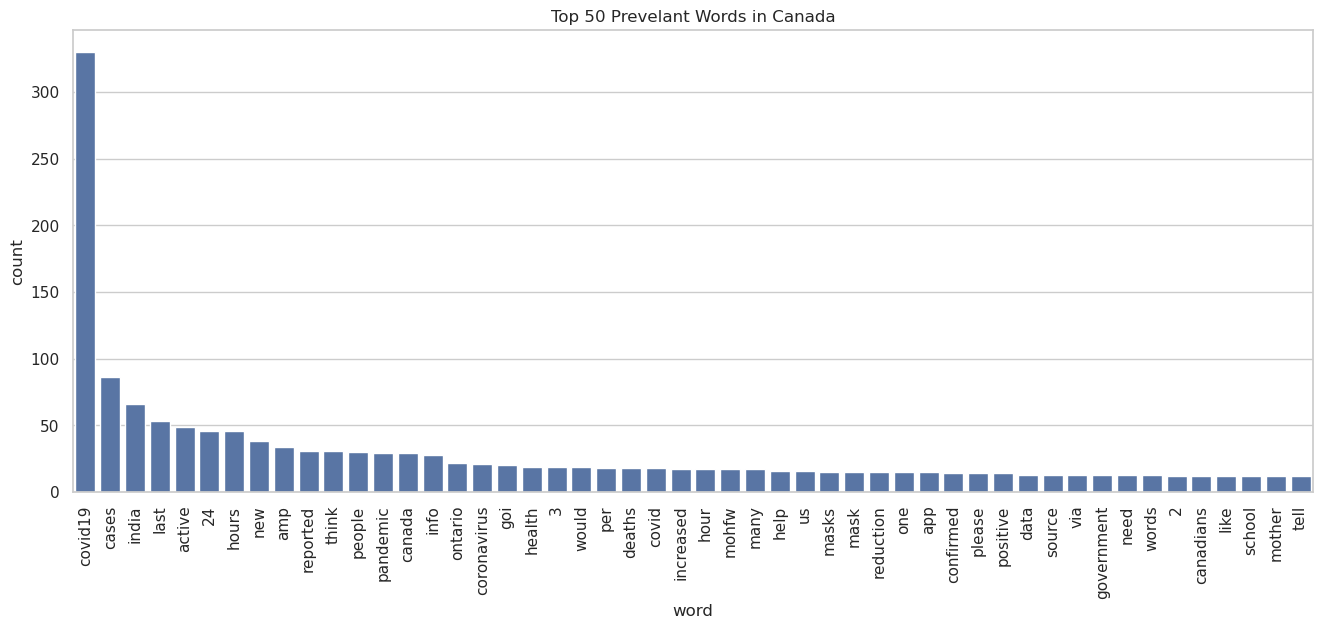

In [150]:
draw_bar_graph_for_text_visualization(df, 'Canada')

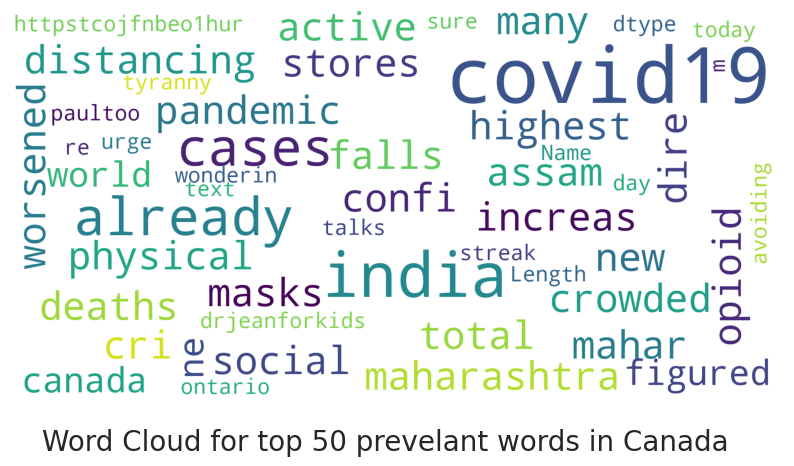

In [151]:
draw_word_cloud(df, 'Canada', 'Word Cloud for top 50 prevelant words in Canada')

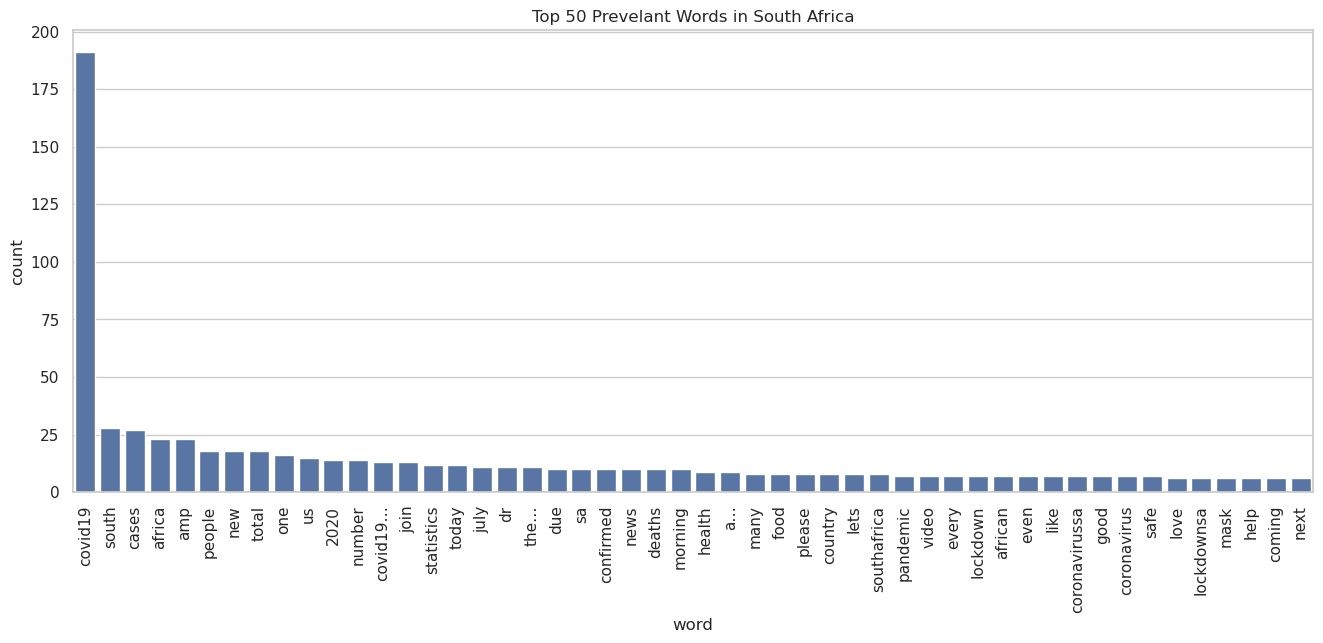

In [152]:
draw_bar_graph_for_text_visualization(df, 'South Africa')

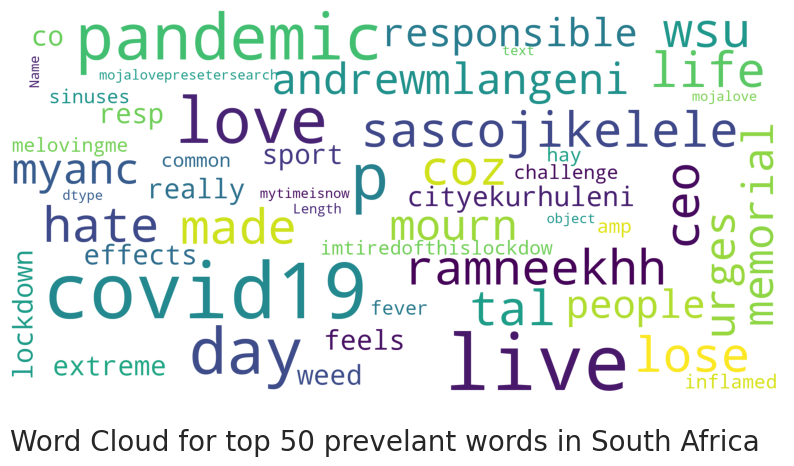

In [153]:
draw_word_cloud(df, 'South Africa', 'Word Cloud for top 50 prevelant words in South Africa')

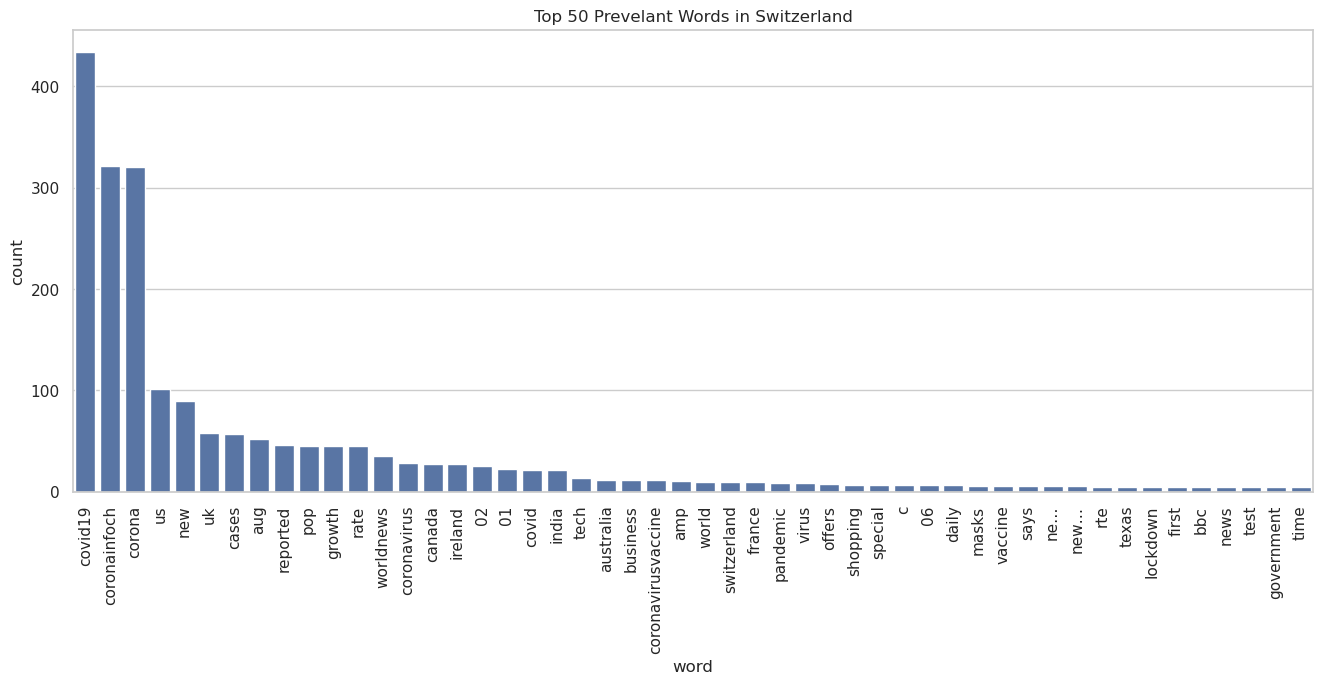

In [154]:
draw_bar_graph_for_text_visualization(df, 'Switzerland')

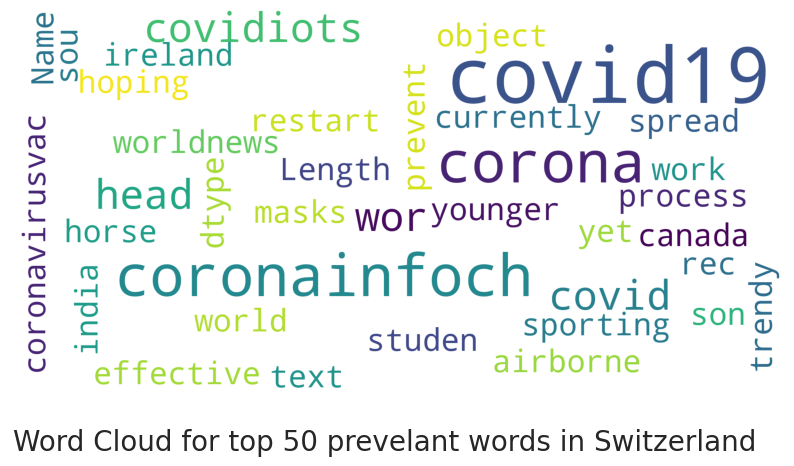

In [155]:
draw_word_cloud(df, 'Switzerland', 'Word Cloud for top 50 prevelant words in Switzerland')

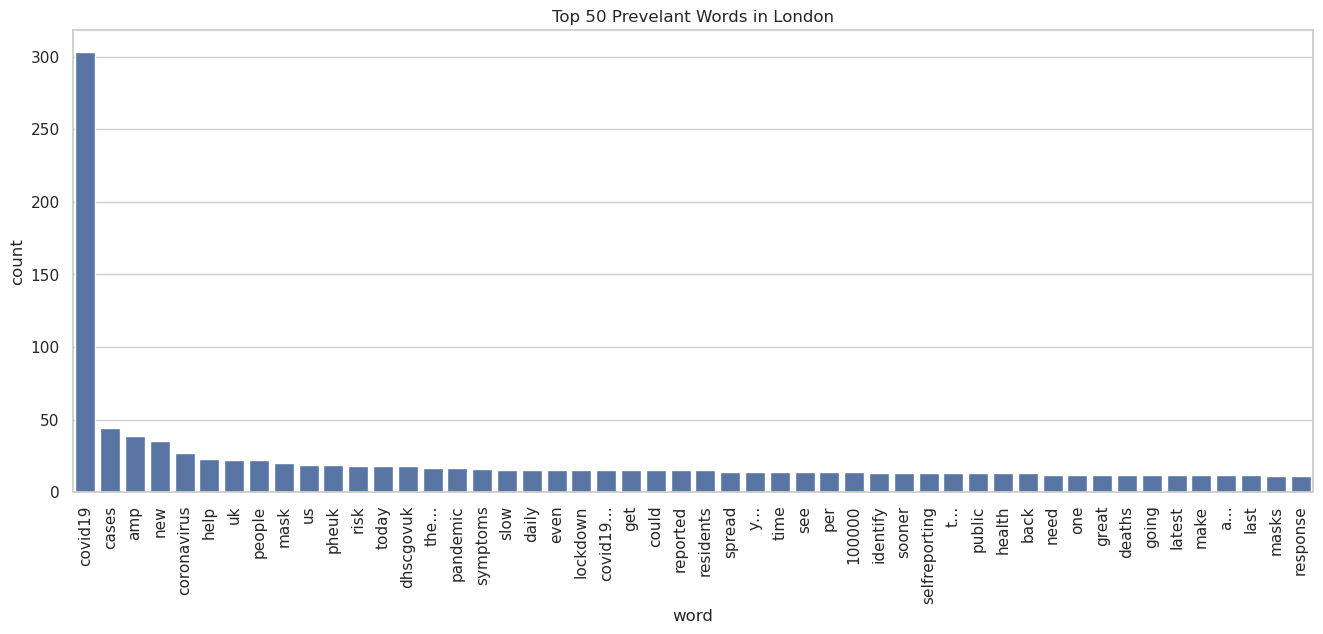

In [156]:
draw_bar_graph_for_text_visualization(df, 'London')

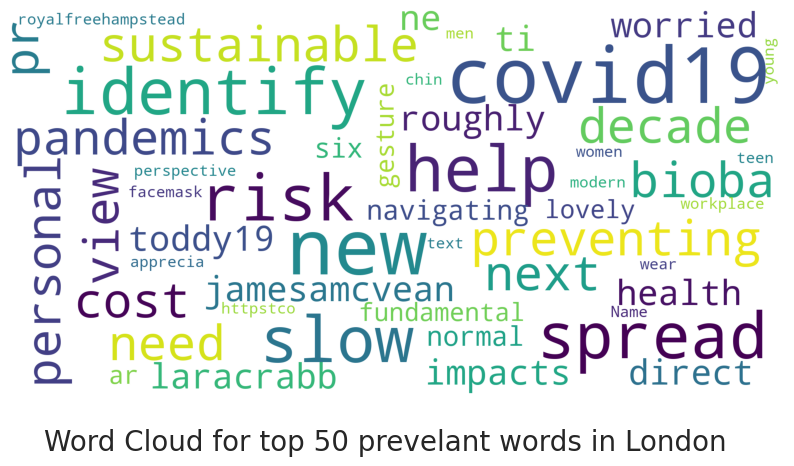

In [157]:
draw_word_cloud(df, 'London', 'Word Cloud for top 50 prevelant words in London')